In [1]:
# Import library
import numpy as np
import pandas as pd

In [2]:
#reading data
dataSales = pd.read_excel(r'D:\SEMESTER 4\IS411 Data Modelling\LAB\Bahan Modul 2\sales_data_sample.xlsx',engine = 'openpyxl', header=0)
#engine = 'openpyxl' ditambahkan jika muncul error "Excel xlsx file; not supported"
dataSales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-02-12 00:00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-01-03 00:00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
dataSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


### Visualization data dengan matplotlib

In [4]:
#mengambil data penjualan per tahun
SalesperYr = dataSales[['YEAR_ID','SALES']].groupby(['YEAR_ID'])['SALES'].sum().reset_index()
SalesperYr['YEAR_ID'] = SalesperYr['YEAR_ID'].astype('string')

In [5]:
import matplotlib.pyplot as plt

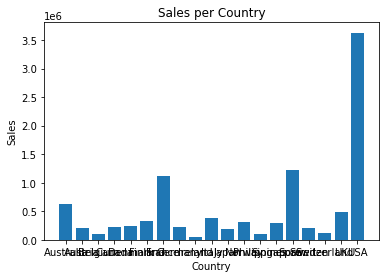

In [6]:
#menampilkan data penjualan per negara

SalesperCnt = dataSales[['COUNTRY','SALES']].groupby(['COUNTRY'])['SALES'].sum().reset_index()

plt.bar(SalesperCnt['COUNTRY'], SalesperCnt['SALES'])
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()

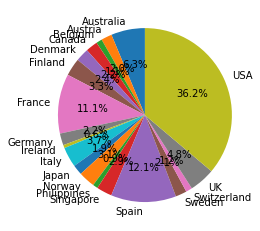

In [7]:
#menampilkan data dalam bentuk pie chart
plt.pie(SalesperCnt['SALES'], labels=SalesperCnt['COUNTRY'], autopct='%1.1f%%', startangle=90)
plt.show()

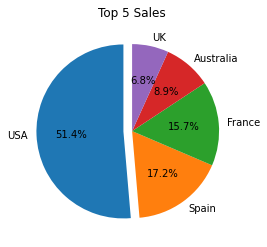

In [8]:
#menampilkan negara dengan top 5 sales

top5sales = SalesperCnt.nlargest(5,['SALES'])

plt.pie(top5sales['SALES'], labels=top5sales['COUNTRY'], autopct='%1.1f%%', startangle=90, explode = (0.1, 0, 0, 0, 0))
plt.title('Top 5 Sales')
plt.show()

In [9]:
#mendapatkan data jumlah sales per bulan

dataSales['MonthYear'] = pd.to_datetime(dataSales['YEAR_ID'].astype('string')+dataSales['MONTH_ID'].astype('string'),
                                       format='%Y%m')

SalesMY = dataSales[['MonthYear','SALES']].groupby(['MonthYear'])['SALES'].sum().reset_index()

Text(0.5, 0, 'Month-Year')

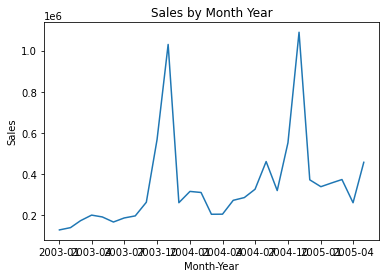

In [10]:
#menampilkan tingkat sales per bulan menggunakan line chart

plt.plot(SalesMY['MonthYear'], SalesMY['SALES'])
plt.title('Sales by Month Year')
plt.ylabel('Sales')
plt.xlabel('Month-Year')

C:\Users\Darren\AppData\Local\Temp\ipykernel_22068\2565617729.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


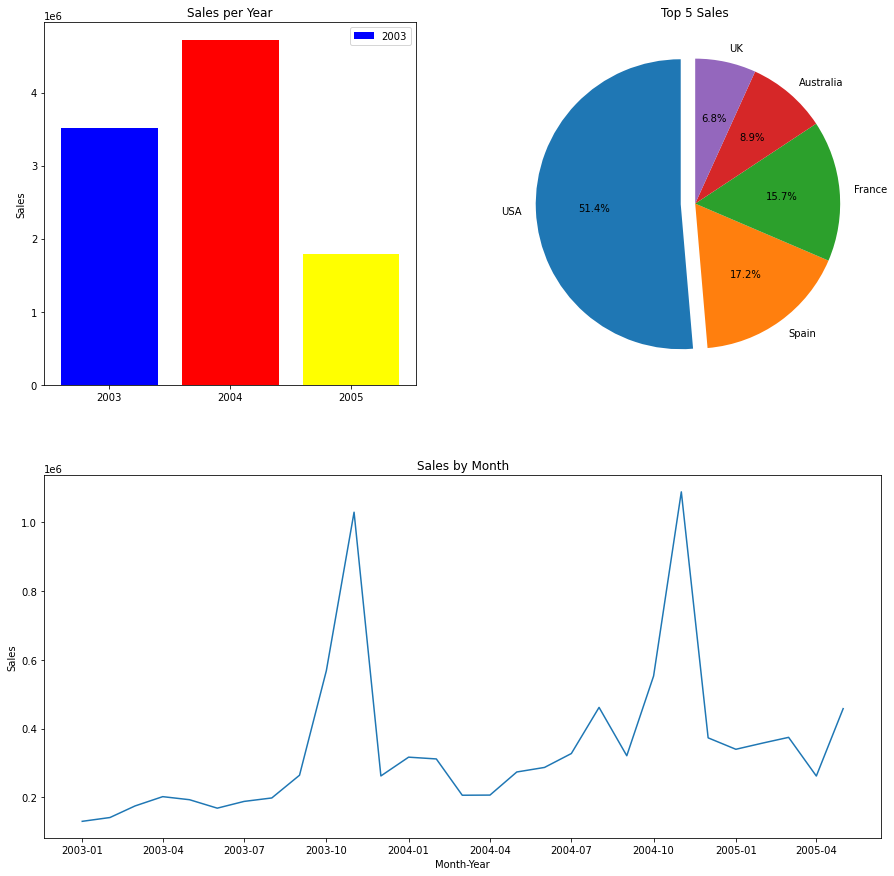

In [11]:
#menampilkan beberapa chart dan mengatur posisi tampilan chart

fig = plt.figure(figsize=(15,15))

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

#bar chart
ax1 = fig.add_subplot(2,2,1)
ax1.bar(SalesperYr['YEAR_ID'], SalesperYr['SALES'],color=('blue','red','yellow'))
ax1.set_title('Sales per Year')
ax1.set_ylabel('Sales')
ax1.legend(labels=SalesperYr['YEAR_ID'])

#pie chart
ax2 = fig.add_subplot(2,2,2)
ax2.pie(top5sales['SALES'],labels=top5sales['COUNTRY'], autopct='%1.1f%%', startangle=90, explode= (0.1, 0, 0, 0, 0))
ax2.set_title('Top 5 Sales')

#line chart
ax3 = fig.add_subplot(2,2,(3,4))
ax3.plot(SalesMY['MonthYear'], SalesMY['SALES'])
ax3.set_ylabel('Sales')
ax3.set_xlabel('Month-Year')
ax3.set_title('Sales by Month')

fig.show()

### Challenge

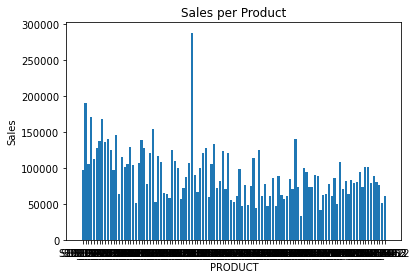

In [12]:
#Tampilkanlah menggunakan chart data penjualan per produk. 
#Kreasikan bagaimana data ditampilkan dan gunakan chart yang menurut Anda 
#paling sesuai dan mudah dipahami oleh pembaca sehingga informasi dapat tersampaikan dengan benar dan menarik.

#mengambil data penjualan per produk

SalesperProd = dataSales[['PRODUCTCODE','SALES']].groupby(['PRODUCTCODE'])['SALES'].sum().reset_index()

plt.bar(SalesperProd['PRODUCTCODE'], SalesperProd['SALES'])
plt.title('Sales per Product')
plt.xlabel('PRODUCT')
plt.ylabel('Sales')
plt.show()

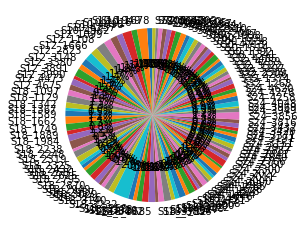

In [13]:
#menampilkan data dalam bentuk pie chart
plt.pie(SalesperProd['SALES'], labels=SalesperProd['PRODUCTCODE'], autopct='%1.1f%%', startangle=90)
plt.show()

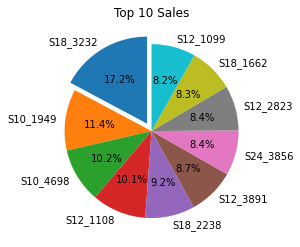

In [14]:
#menampilkan produk dengan top 10 sales

top5salesProd = SalesperProd.nlargest(10,['SALES'])

plt.pie(top5salesProd['SALES'], labels=top5salesProd['PRODUCTCODE'], autopct='%1.1f%%', startangle=90, explode = (0.1, 0, 0, 0, 0 , 0 ,0, 0 , 0, 0))
plt.title('Top 10 Sales')
plt.show()